# RNN (Recurrent Neural Networks)
Articulo recomendado: http://karpathy.github.io/2015/05/21/rnn-effectiveness/

## Que tienen de nuevo respecto a MLP y CNN?
- MLP y CNN solo aceptan un vector de entrada de tamaño fijo y devuelve una vector de salida de tamaño fijo
- RNN trabjan con secuencias tanto a la entrada como a la salida

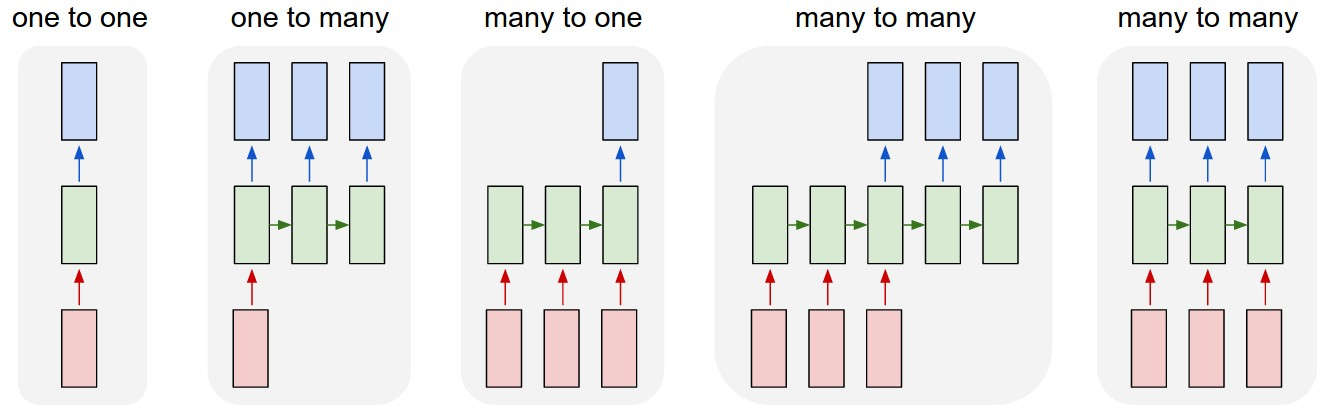

Aclaraciones: 
- Cada cuadrado no es una neurona si no una capa que puede contener N neuronas
- Cada flecha representa la interconexión entre dos capas. Los pesos forman una matriz de la N1xN2 donde N1 y N2 son la cantidad de neuronas en cada capa respectivamente.

## Tipos
- **One to One**: CNN, MLP
- **One to many**: Image captioning
- **Many to one**: Sentiment Analisys, Detectar voz de hombre vs voz de mujer
- **Many to Many**: Traducción
- **Many to Many Sincronizado**: Etiquetado de tramas de video, Brain Computer Interface (BCI): Controlar una silla de ruedas

# Modelos de lenguaje Generativos:
- Predecir la proxima palabra en funcion de las anteriores
- Predecir el proximo caracter en función de los anteriores

**Resultado**: Probabilidad en función de una secuencia

**Aplicaciones** (Mas allá de la posibilidad de generar texto):
- OCR
- Speach2Text
- Detección de autores

## "If training vanilla neural nets is optimization over functions, training recurrent nets is optimization over programs."
- Es una secuencia de ejecución mas que una clasificación
- Las RNN son Turing completo en principio [Turing Complete](https://en.wikipedia.org/wiki/Turing_completeness), [RNN Turing complete](http://binds.cs.umass.edu/papers/1995_Siegelmann_Science.pdf)

# Detalles de la arquitectura:

## Unidad de Elman o RNN unit

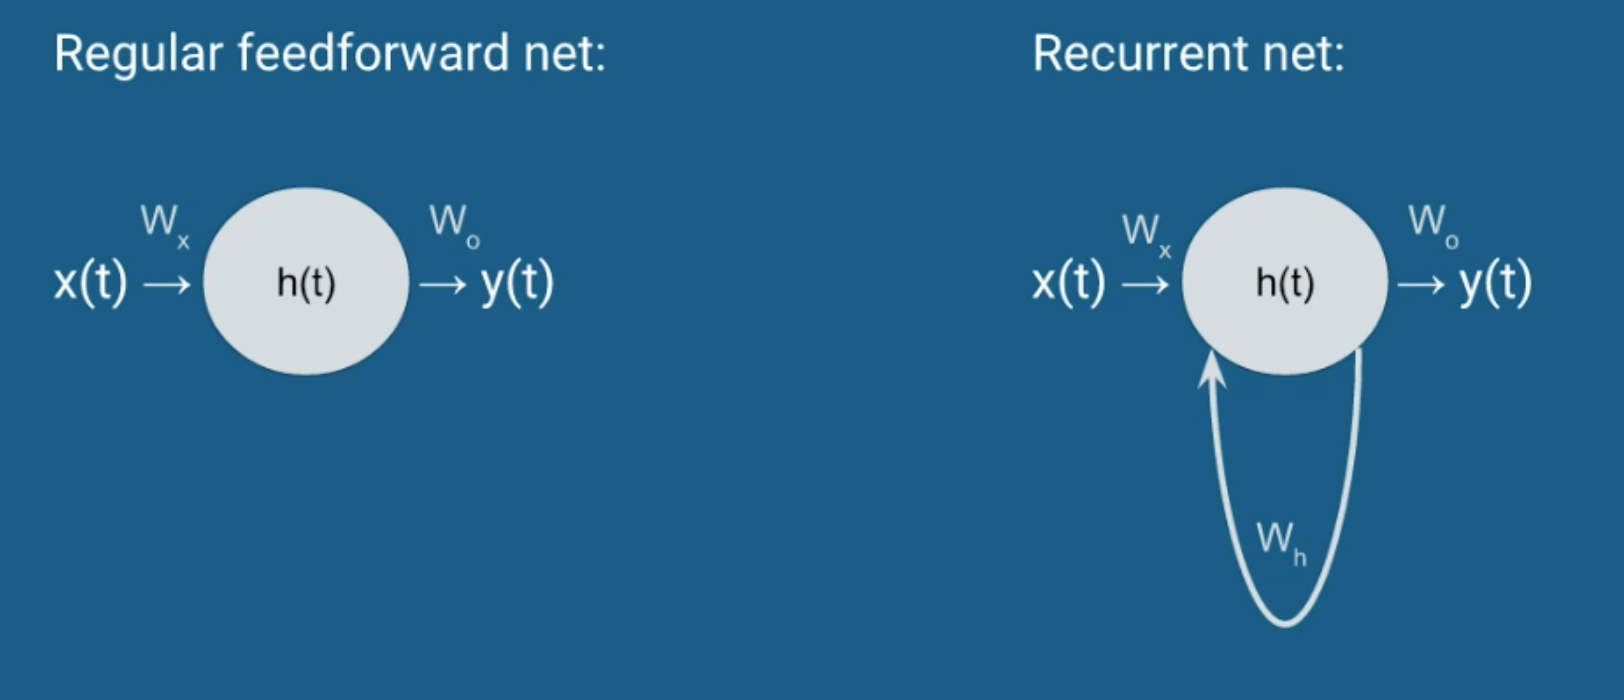
¿Cual es el tamaño de $W_h$?

Todo se conecta con todo -> Si hay M hidden units tenemos $M^2$ $W_h$s 

## En ecuaciones:
$h_t = f(W_h^T h_{t-1} + W_x^T X_t + b_h)$

$y_t = softmax(W_o^T h_t + b_o)$

$f$ es tanh usualmente pero puede ser RELU, sigmoid, etc

In [58]:
# Ejemplo
M = 2

h = np.array([1, -2]).reshape(2,1)
Wh = np.array([[0,-1], [2,1]])

# Dimension de entrada 4
Xt = np.array([1, -1, 2]).reshape(3,1)
print('Xt')
print(Xt)
# Dimension de Wx?
Wx = np.array([[-1,1],[1,0],[2,1]])
print("Wx:")
print(Wx)

bo = np.array([-1, 1]).reshape(2,1)

print('h:')
print(h)
print('Wh:')
print(Wh)
print()

Xt
[[ 1]
 [-1]
 [ 2]]
Wx:
[[-1  1]
 [ 1  0]
 [ 2  1]]
h:
[[ 1]
 [-2]]
Wh:
[[ 0 -1]
 [ 2  1]]



In [61]:
a = Wh.T.dot(h) + Wx.T.dot(Xt) + bo
h_ = np.tanh(a)
print(a)
print('h luego de time step:')
print(h_)

[[-3]
 [ 1]]
h luego de time step:
[[-0.99505475]
 [ 0.76159416]]


In [70]:
Wo = np.array([[0.5, 0.5],[0.5, 0.5]]).reshape(2,2)
ao = Wo.T.dot(h_)
print(ao)
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    return np.exp(x) / np.sum(np.exp(x), axis=0)

print(softmax(ao))

[[-0.1167303]
 [-0.1167303]]
[[ 0.5]
 [ 0.5]]


## Entrada en Vanilla Networks:

NxD, donde N es la cantidad de muestras y D es la cantidad de features

In [1]:
import numpy as np

In [8]:
# Ejemplo N = 3, D = 2
Ex_1 = np.array([[0.5, 0.3], [0.2, 0.1], [0.7, 0.3]])
print(Ex_1)
print(Ex_1.shape)

[[ 0.5  0.3]
 [ 0.2  0.1]
 [ 0.7  0.3]]
(3, 2)


## Entrada en RNNs:

Secuencias de longitud fija

NxTxD, donde T es la longitud de la secuencia

In [14]:
# Ejemplo N = 4, T = 3, D=2
Ex_2 = np.array([[[0.5, 0.3], [0.2, 0.1], [0.7, 0.3]], [[0.54, 0.1], [0.23, 0.3], [0.9, 0.1]], [[0.5, 0.3], [0.2, 0.1], [0.7, 0.3]], [[0.54, 0.1], [0.23, 0.3], [0.9, 0.1]]])
print(Ex_2)
print(Ex_2.shape)

[[[ 0.5   0.3 ]
  [ 0.2   0.1 ]
  [ 0.7   0.3 ]]

 [[ 0.54  0.1 ]
  [ 0.23  0.3 ]
  [ 0.9   0.1 ]]

 [[ 0.5   0.3 ]
  [ 0.2   0.1 ]
  [ 0.7   0.3 ]]

 [[ 0.54  0.1 ]
  [ 0.23  0.3 ]
  [ 0.9   0.1 ]]]
(4, 3, 2)


Secuencias de longitud variable

In [21]:
Ex_3 = np.array([[[0.5, 0.3], [0.7, 0.3]], [[0.54, 0.1], [0.23, 0.3], [0.9, 0.1]], [[0.7, 0.3]], [[0.54, 0.1], [0.23, 0.3], [0.9, 0.1]]])
print(Ex_3)
print(Ex_3.shape)
print(np.array(Ex_3[0]).shape)
print(np.array(Ex_3[1]).shape)
print(np.array(Ex_3[2]).shape)

[list([[0.5, 0.3], [0.7, 0.3]])
 list([[0.54, 0.1], [0.23, 0.3], [0.9, 0.1]]) list([[0.7, 0.3]])
 list([[0.54, 0.1], [0.23, 0.3], [0.9, 0.1]])]
(4,)
(2, 2)
(3, 2)
(1, 2)


## Ejemplo con caracteres y one-hot encoding